In [28]:
from ResearchMain import *

In [30]:
gene_abundance_remove = gene_abundance.drop(['Bacterial 16S rRNA', 'Archaeal 16S rRNA'], axis=1)
gene_abundance_remove

Gene,AOA_amoA,AOB_amoA,nxrA,narG,napA,nirK,nirS,nosZ,cnorB,hzsA,hzsB,hzo,nifH
ID,,,,,,,,,,,,,
D-H1,1.309203e+07,362167.371442,7.557514e+06,6.193215e+05,2.714383e+06,6.208402e+05,7.556193e+07,1.101283e+06,2.877926e+05,6.900954e+05,9.771719e+05,59763.803097,1.330116e+04
D-H2,1.176137e+07,369272.095555,5.529952e+06,5.628594e+05,1.209347e+06,7.747804e+05,1.609800e+08,4.226340e+05,1.283924e+05,1.647053e+06,8.417798e+05,58386.778515,1.287674e+04
D-H3,6.728205e+06,487645.491524,1.466007e+07,2.953696e+05,8.957945e+05,4.032794e+05,4.983680e+08,8.871942e+05,1.290810e+05,1.504869e+06,1.353839e+06,48393.786152,9.917281e+03
D-H4,1.714973e+07,522516.452775,1.169370e+07,5.224020e+04,6.382258e+05,3.668576e+05,1.643910e+08,3.468487e+05,1.693446e+05,7.444430e+05,3.205211e+05,34202.593594,2.046502e+04
D-H5,1.210502e+07,562590.301880,1.201148e+07,7.642274e+04,1.929301e+05,8.655376e+05,3.047211e+08,8.382781e+05,1.602435e+05,9.150162e+05,2.760314e+05,32529.196754,1.908557e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
W-P5,4.467447e+07,533952.013512,2.635662e+09,5.189513e+05,2.841631e+06,3.023162e+07,8.470736e+07,2.139064e+08,6.096623e+05,2.120688e+06,4.861860e+06,368617.165021,6.576618e+05
W-P6,3.038296e+07,358944.921991,4.657828e+09,4.436650e+05,9.169049e+06,1.379646e+07,5.604978e+07,3.832982e+08,8.235145e+05,3.936532e+06,2.898582e+06,219426.589483,1.182591e+06
W-P7,1.133204e+07,387550.695182,4.406424e+09,3.765749e+06,2.165217e+06,7.350488e+06,7.570608e+07,6.144403e+07,1.381359e+06,5.360496e+06,1.478238e+07,286465.334411,2.124679e+06


In [31]:
# PCA分析
gene_pca = calc_pca(gene_abundance_remove)
gene_pca

,PCA 0,PCA 1,River,Period
ID,,,,
D-H1,2.258209,0.030599,Hangbu River,Dry Season
D-H2,2.546645,0.482936,Hangbu River,Dry Season
D-H3,3.102126,2.206868,Hangbu River,Dry Season
D-H4,2.474914,1.033470,Hangbu River,Dry Season
D-H5,2.759804,1.668495,Hangbu River,Dry Season
...,...,...,...,...
W-P5,-0.707361,0.645814,Pai River,Wet Season
W-P6,-1.046843,-0.269898,Pai River,Wet Season
W-P7,-0.808801,-1.124603,Pai River,Wet Season


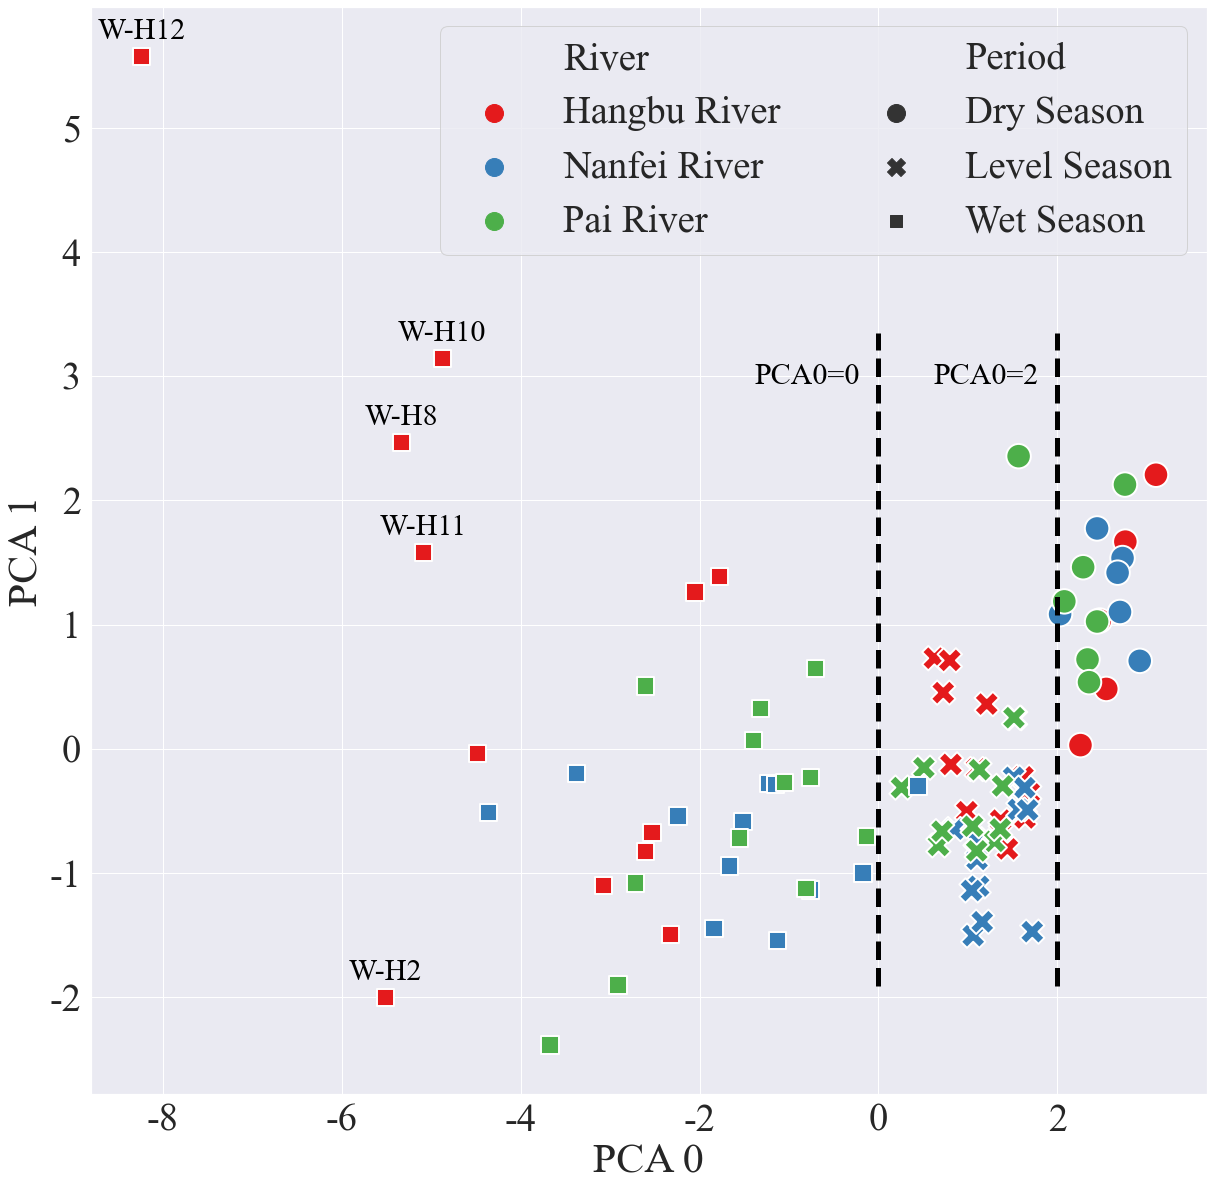

In [38]:
# 可视化
sns.set(
    style='darkgrid',
    font='Times New Roman',
    font_scale=3.5
)
plt.figure(figsize=(20, 20))
sns.scatterplot(
    data=gene_pca,
    x='PCA 0',
    y='PCA 1',
    hue='River',
    style='Period',
    s=600,
    palette="Set1",  # 颜色版
)

# 分割线
split_line_x = [0, 2]
for x in split_line_x:
    plt.axvline(x, ymin=0.1, ymax=0.7, color='black', linestyle='--', linewidth=5)
    plt.text(
        x - .8,
        3,
        f'PCA0={x}',
        fontdict={'size': '30', 'color': 'white'},
        color='black',
        ha='center', va='center'
    )

# 特殊点标记并打印
# 要进行标记的特殊点
spot_name = {
    'W-H10': [0, .2],
    'W-H11': [0, .2],
    'W-H12': [0, .2],
    'W-H2': [0, .2],
    'W-H8': [0, .2],
}

for name, coor in spot_name.items():
    # 计算坐标：原始位置+偏移
    x, y = gene_pca.loc[name, 'PCA 0'] + coor[0], gene_pca.loc[name, 'PCA 1'] + coor[1]

    plt.text(
        x,
        y,
        name,
        fontdict={'size': '30', 'color': 'white'},
        color='black',
        ha='center', va='center'
    )

# 图例
plt.legend(
    ncol=2,
    loc='upper right',
    # bbox_to_anchor=(0.5, 1.1),
    markerscale=3,  # 图例中图标的调整
    # prop={'family':'SimHei','size':4}  # 图例中文字的调整
)

plt.savefig(EXPORT_PATH + '功能基因PCA分析.svg', dpi=DPI, bbox_inches='tight')